In [2]:
# import all the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# Read the file and check whether it can be used for linear Regression
df=pd.read_csv("Fish.csv")
df.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
# Create a new data frame from the previous dataframe that is used only for linear regression 
# here i choose the height as independent variable and Weight is the target one
df1=df[['Weight','Height']]
df1.columns

Index(['Weight', 'Height'], dtype='object')

In [5]:
# data preprocessing
df1.isnull().sum()

Weight    0
Height    0
dtype: int64

In [16]:
# there is no missing values so no need to handle it
df1.describe()

,Weight,Height
count,159.000000,159.000000
mean,398.326415,8.970994
std,357.978317,4.286208
min,0.000000,1.728400
25%,120.000000,5.944800
50%,273.000000,7.786000
75%,650.000000,12.365900
max,1650.000000,18.957000


In [7]:
#assign the independent and target variables
x=df[['Height']]
y=df['Weight']

In [8]:
#traintestsplit the dataset
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.3,random_state=2)

In [9]:
# creating the model 
Model=LinearRegression().fit(xTrain,yTrain)


In [10]:
# predict the results for the give xtest 
xpredict=Model.predict(xTest)
print(xpredict)

[ 692.88004193  628.36903512  -31.38325139  719.22475255  188.21241637
  286.7590593   542.99788153  432.17835176 1018.68193777  266.70122586
  613.25044316  495.42947591  318.85159281  230.59712566  246.26103996
  302.70503689  683.05170355  848.40973606  800.02648095  424.97006787
  217.03928387   90.3928699   241.69161478  213.71093713  855.90008324
  287.3858666   387.85053985  157.54273542  256.1708633   606.29288219
  620.4712632   318.47550843  609.64630122  258.23932737  197.50170048
  179.44965038  578.13669849  767.79604984  271.3019914   252.49777255
  -45.56163241  356.47256666  279.7388176   156.33299734  -30.78778446
  311.8313511   493.08521662  731.25318454]


In [11]:
# predict the results for new values 
new_value1=pd.DataFrame({"Height":[45.34]}) # using data frame 
new_value2=np.array([[23.34]]) # using the array but it will warning
print(Model.predict(new_value1))
print(Model.predict(new_value2))

[2672.3876244]
[1293.41157521]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
# Identify the errors
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error : ",mean_absolute_error(yTest,xpredict))
print("Mean Squared Error : ",mean_squared_error(yTest,xpredict))
print("r2 Score : ",r2_score(yTest,xpredict))

Mean Absolute Error :  179.91022186671884
Mean Squared Error :  61315.21859023408
r2 Score :  0.4247741429791493


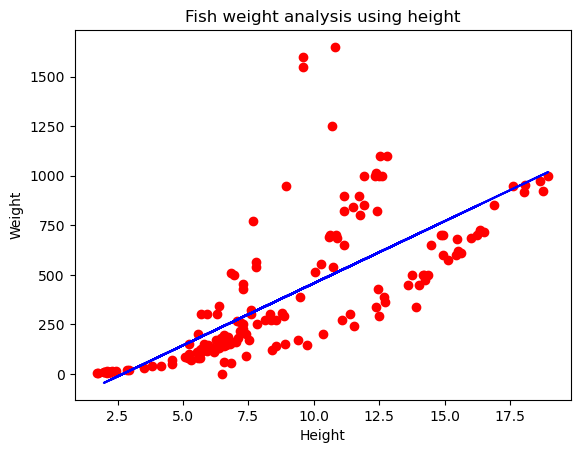

In [19]:
# visualization
plt.scatter(x,y,color='red')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot(xTest, xpredict, color='blue')
plt.title("Fish weight analysis using height")
plt.show()